In [1]:
##Import libraries
import pandas as pd
from scipy import stats
import os
import datetime
import numpy as np
import glob
import matplotlib.pyplot as plt

to_datetime = lambda d: pd.to_datetime(d, format='%d/%m/%Y')

In [ ]:
import tkinter
from tkinter import filedialog


##Open DataFrame
cotacoes_dataFrame = pd.DataFrame()

##Initialize Tkinter and Add Directory
root = tkinter.Tk()
root.withdraw()

file_type = 'csv'

input_file = filedialog.askopenfile(parent=root,mode='r+',filetypes=[('Input Files', '%s' %file_type), title = 'Choose a Financial .%s File' %file_type])

print(input_file)

In [2]:
##Open DataFrame
cotacoes_dataFrame = pd.DataFrame()

dir = os.path.join(os.path.expanduser('~'), 'Estudos_Bolsa', 'dados', 'b3', 'cotacoes_diarias') + '/'

acao_key = []

for file_name in glob.glob(dir + '*3.sa.csv'):
    acao_key.append(file_name[-12:-7])
    cotacoes_dataFrame = cotacoes_dataFrame.merge(pd.read_csv(file_name, converters={'date': to_datetime})
                                                  .set_index('date').add_suffix(acao_key[-1]), how='outer', left_index=True, right_index=True)

cotacoes_dataFrame.tail()

,openFLEX3,highFLEX3,lowFLEX3,closeFLEX3,negFLEX3,volFLEX3,openCAMB3,highCAMB3,lowCAMB3,closeCAMB3,...,lowBBML3,closeBBML3,negBBML3,volBBML3,openBMIN3,highBMIN3,lowBMIN3,closeBMIN3,negBMIN3,volBMIN3
date,,,,,,,,,,,,,,,,,,,,,
2019-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.0,15.0,15.0,15.0,1.0,150000.0


In [3]:
#edição do dataframe
start_date = '1/08/2015'
cot2015_dataFrame = cotacoes_dataFrame[cotacoes_dataFrame.index >= to_datetime(start_date)]
cot2015_dataFrame =cot2015_dataFrame.dropna(axis=1, how='any')


cot2015_dataFrame.tail()

,openLAME3,highLAME3,lowLAME3,closeLAME3,negLAME3,volLAME3,openTCSA3,highTCSA3,lowTCSA3,closeTCSA3,...,lowWEGE3,closeWEGE3,negWEGE3,volWEGE3,openLIGT3,highLIGT3,lowLIGT3,closeLIGT3,negLIGT3,volLIGT3
date,,,,,,,,,,,,,,,,,,,,,
2019-08-22,13.80,13.83,13.45,13.49,2492.0,510991400.0,1.37,1.37,1.33,1.33,...,22.69,22.73,9401.0,4.567380e+09,20.00,20.52,19.65,20.27,10102.0,5.986842e+09
2019-08-23,13.49,13.61,13.11,13.18,4594.0,975877900.0,1.32,1.34,1.26,1.29,...,22.06,22.22,13419.0,6.077991e+09,20.00,20.28,19.65,19.90,6103.0,3.745741e+09
2019-08-26,13.17,13.34,13.01,13.09,4123.0,866565000.0,1.31,1.31,1.22,1.24,...,21.55,21.55,14730.0,6.483373e+09,19.98,20.01,19.31,19.50,6109.0,5.816606e+09
2019-08-27,13.11,13.34,12.91,13.30,3376.0,737105600.0,1.25,1.27,1.22,1.26,...,21.55,21.68,17755.0,1.155291e+10,19.75,19.75,19.13,19.41,6826.0,3.302009e+09
2019-08-28,13.34,13.39,13.17,13.37,1835.0,426738200.0,1.26,1.27,1.23,1.27,...,21.20,22.09,14241.0,9.851956e+09,19.54,19.58,19.10,19.38,9475.0,3.756084e+09


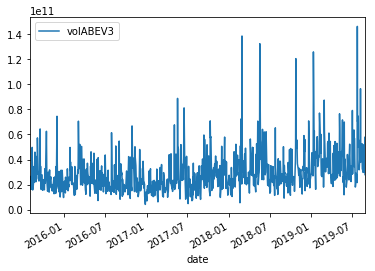

In [4]:
cot2015_dataFrame.plot(y='volABEV3')

In [5]:
def media_stock_vol(df):
    mediaVol = dict()
    selected_assets = []
    keys = df.keys()    

    for key in keys:
        if (key.startswith('vol')):
            selected_assets.append(key[-5:])

    for a_asset in selected_assets:
        mediaVol[a_asset] = int(stats.hmean(df['vol'+a_asset], axis=0))
    print(mediaVol)
    return(mediaVol)

In [6]:
mediaVol = media_stock_vol(cot2015_dataFrame)

{'LAME3': 590839328, 'TCSA3': 168269457, 'ROMI3': 16282674, 'TUPY3': 485908425, 'ITSA3': 34099581, 'MRVE3': 3121389270, 'LEVE3': 398147079, 'BBAS3': 22269734527, 'CCRO3': 7283673590, 'LOGN3': 36372858, 'GOAU3': 19199041, 'EVEN3': 299135002, 'ITUB3': 305620144, 'CSNA3': 5617932835, 'MGLU3': 766846169, 'HBOR3': 85318099, 'ANIM3': 190803366, 'CPLE3': 66379602, 'TIMP3': 2700938980, 'ODPV3': 1239834556, 'MULT3': 4071804986, 'JHSF3': 53045275, 'BRAP3': 10389291, 'ECOR3': 2091865560, 'ENBR3': 2507977835, 'ABEV3': 23175214531, 'BEEF3': 937129772, 'CMIG3': 91674469, 'POSI3': 15509985, 'SGPS3': 15500370, 'JBSS3': 8105491535, 'GGBR3': 67107592, 'SBSP3': 3822515396, 'CPFE3': 1641372452, 'KROT3': 10324325465, 'TOTS3': 1341645978, 'EMBR3': 4376007411, 'ENEV3': 5678320, 'KEPL3': 37117208, 'BRPR3': 372007587, 'PTBL3': 21783066, 'GRND3': 470195108, 'SLCE3': 450075574, 'BBRK3': 12890283, 'CIEL3': 12015651641, 'RENT3': 4625804832, 'FLRY3': 1077441990, 'AGRO3': 43493110, 'MDIA3': 1428348276, 'DTEX3': 1114

In [15]:
def chimp_finder(df, vol_increase, percent):
    """chimp_finder looks for micos in df according to vol_increase"""
    delta1 = datetime.timedelta(days=1)
    selected_assets = []
    keys = df.keys()
    
    for key in keys:
        if (key.startswith('vol')):
            selected_assets.append(key[-5:])
    
    #print(selected_assets)
    
    micos = dict()
    for a_asset in selected_assets:
        micos[a_asset] = [[]for _ in range(3)]
        
        for today in range(len(df.index)):
            
            try:
                if (df['vol'+a_asset][today] >= vol_increase*mediaVol[a_asset]) and df['high'+a_asset][today] == df['close'+a_asset][today] and (((df['close'+a_asset][today]-df['close'+a_asset][today-1]))/(df['close'+a_asset][today-1]))*100 > percent:
                    micos[a_asset][0].append(df.index[today])
                    micos[a_asset][1].append(df['close' + a_asset][today])
                    micos[a_asset][2].append(df['open' + a_asset][today+1])
                    #print(str(df.index[today]) + ' ' + a_asset)
            except:
                pass
    #print(micos)
    return micos
    #    return  df['vol']
#num = 70
#micos = chimp_finder(cot2015_dataFrame, num)

In [19]:
def gain(micos):
    gain_tot = []
    count = 0
    for stock, lista in micos.items():
        print('Para ' + str(price_inc) + '% de aumento.\n\n')
        print(stock + ' possuiu alta de volume em ' + str(volume_inc) +'x nos dias:\n')
        try:
            for i in range(len(lista[0])):
                print(str(lista[0][i]) + ' => ' + str(lista[1][i]) + ', ' + str(lista[2][i]))
                gain = ((lista[2][i] - lista[1][i])/lista[1][i])*100
                gain_tot.append(gain)
                print(f'Ganho percentual: {gain:.2f}%\n')
            print('\n')
        except:
            print('Deu erro na empresa ' + stock)
            count = count + 1
    print('\nO erro ocorreu ' + str(count) + ' vezes.')
    return gain_tot

In [17]:
def calcmed(gain_tot):
    mean = 0
    count = 0
    neg = 0
    count_neg = 0
    all_mean = 0
    for i in gain_tot:
        if i > 0:
            mean = mean + i
            count = count + 1
        else:
            neg = neg + i
            count_neg = count_neg + 1
        all_mean = all_mean + i
    #print('Média positiva: ' + str(mean/count))
    #print('Média negativa: ' + str(neg/count_neg))
    if count == 0 and count_neg == 0:
        return 1, 1, np.std(gain_tot)
    elif count_neg == 0 and count != 0:
        return mean/count, 1, np.std(gain_tot)
    elif count_neg != 0 and count == 0:
        return 1, neg/count_neg, np.std(gain_tot)
    else:
        return mean/count, neg/count_neg, np.std(gain_tot), all_mean/(count+count_neg)

In [20]:
result = dict()
for price_inc in range(1,10,1):
    result[price_inc] = dict()
    for volume_inc in [2, 3, 4, 5, 8, 10, 20]:
        result[price_inc][volume_inc] = []
        micos = chimp_finder(cot2015_dataFrame, volume_inc, price_inc)
        gain_tot = gain(micos)
        result[price_inc][volume_inc].append(calcmed(gain_tot))
        

Para 1% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:

2016-11-30 00:00:00 => 12.89, 12.71
Ganho percentual: -1.40%

2017-03-16 00:00:00 => 13.54, 13.65
Ganho percentual: 0.81%

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%

2018-01-18 00:00:00 => 12.68, 12.68
Ganho percentual: 0.00%

2018-02-21 00:00:00 => 12.96, 13.0
Ganho percentual: 0.31%

2018-03-09 00:00:00 => 13.2, 13.21
Ganho percentual: 0.08%

2018-10-31 00:00:00 => 14.0, 13.79
Ganho percentual: -1.50%

2018-11-22 00:00:00 => 13.6, 13.53
Ganho percentual: -0.51%

2019-01-24 00:00:00 => 15.53, 15.38
Ganho percentual: -0.97%

2019-02-14 00:00:00 => 14.73, 14.73
Ganho percentual: 0.00%

2019-05-09 00:00:00 => 13.09, 13.0
Ganho percentual: -0.69%

2019-07-10 00:00:00 => 13.99, 14.0
Ganho percentual: 0.07%



Para 1% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2015-09-2

Para 1% de aumento.


RSID3 possuiu alta de volume em 2x nos dias:

2015-08-06 00:00:00 => 0.87, 0.86
Ganho percentual: -1.15%

2015-09-11 00:00:00 => 0.6, 0.61
Ganho percentual: 1.67%

2015-09-17 00:00:00 => 0.74, 0.82
Ganho percentual: 10.81%

2015-10-05 00:00:00 => 0.92, 0.96
Ganho percentual: 4.35%

2015-10-09 00:00:00 => 1.22, 1.17
Ganho percentual: -4.10%

2016-02-03 00:00:00 => 3.5, 4.1
Ganho percentual: 17.14%

2016-03-23 00:00:00 => 4.92, 4.97
Ganho percentual: 1.02%

2016-04-15 00:00:00 => 4.53, 4.6
Ganho percentual: 1.55%

2016-05-30 00:00:00 => 4.19, 4.19
Ganho percentual: 0.00%

2016-07-07 00:00:00 => 3.5, 3.55
Ganho percentual: 1.43%

2016-08-05 00:00:00 => 5.59, 5.71
Ganho percentual: 2.15%

2016-10-03 00:00:00 => 4.0, 4.0
Ganho percentual: 0.00%

2017-01-11 00:00:00 => 4.06, 4.35
Ganho percentual: 7.14%

2017-01-30 00:00:00 => 7.81, 7.88
Ganho percentual: 0.90%

2017-03-01 00:00:00 => 8.94, 8.68
Ganho percentual: -2.91%

2017-03-29 00:00:00 => 7.57, 7.58
Ganho percentua

Para 1% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:

2017-03-16 00:00:00 => 13.54, 13.65
Ganho percentual: 0.81%

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%

2018-03-09 00:00:00 => 13.2, 13.21
Ganho percentual: 0.08%



Para 1% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2015-10-09 00:00:00 => 3.17, 3.11
Ganho percentual: -1.89%

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-11-03 00:00:00 => 2.98, 2.99
Ganho percentual: 0.34%

2015-12-17 00:00:00 => 2.59, 2.55
Ganho percentual: -1.54%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2017-02-15 00:00:00 => 3.31, 3.31
Ganho percentual: 0.00%

2017-09-15 00:00:00 => 2.66

Para 1% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:

2017-03-16 00:00:00 => 13.54, 13.65
Ganho percentual: 0.81%

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%



Para 1% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-12-17 00:00:00 => 2.59, 2.55
Ganho percentual: -1.54%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 1% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00

Para 1% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:

2017-03-16 00:00:00 => 13.54, 13.65
Ganho percentual: 0.81%

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%



Para 1% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 1% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-08-24 00:00:00 => 5.55, 5.57
Ganho percentual: 0.36%

2017-10-03 00:00:00 =>

Para 1% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%



Para 1% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 1% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2017-12-28 00:00:00 => 7.7, 7.71
Ganho percentual: 0.13%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9

Para 1% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 1% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 1% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.

Para 1% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 1% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 1% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.51, 10.55
Ganho percentual: 0.38%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 1% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 1% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:

2017-12-14 00:00:00 => 10.4, 10.36
Ganho percentual: -0.38%



Para 1% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 1% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 1% de aumento.


BBAS

Para 2% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:

2016-11-30 00:00:00 => 12.89, 12.71
Ganho percentual: -1.40%

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%

2018-01-18 00:00:00 => 12.68, 12.68
Ganho percentual: 0.00%

2018-02-21 00:00:00 => 12.96, 13.0
Ganho percentual: 0.31%

2018-03-09 00:00:00 => 13.2, 13.21
Ganho percentual: 0.08%

2018-10-31 00:00:00 => 14.0, 13.79
Ganho percentual: -1.50%

2019-01-24 00:00:00 => 15.53, 15.38
Ganho percentual: -0.97%

2019-05-09 00:00:00 => 13.09, 13.0
Ganho percentual: -0.69%

2019-07-10 00:00:00 => 13.99, 14.0
Ganho percentual: 0.07%



Para 2% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2015-10-09 00:00:00 => 3.17, 3.11
Ganho percentual: -1.89%

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-10-30 00:00:00 => 2.92, 2.92
Ganho percentual: 0.00%

2015-11-03 00:

2019-04-25 00:00:00 => 1.49, 1.48
Ganho percentual: -0.67%

2019-07-04 00:00:00 => 23.99, 24.0
Ganho percentual: 0.04%

2019-08-12 00:00:00 => 28.0, 28.0
Ganho percentual: 0.00%

Deu erro na empresa PMAM3
Para 2% de aumento.


MRFG3 possuiu alta de volume em 2x nos dias:

2015-10-02 00:00:00 => 6.83, 6.87
Ganho percentual: 0.59%

2017-01-26 00:00:00 => 6.6, 6.6
Ganho percentual: 0.00%

2017-04-25 00:00:00 => 6.83, 6.82
Ganho percentual: -0.15%

2018-10-16 00:00:00 => 5.87, 5.9
Ganho percentual: 0.51%

2018-10-22 00:00:00 => 6.18, 6.18
Ganho percentual: 0.00%

2019-01-30 00:00:00 => 6.25, 6.27
Ganho percentual: 0.32%

2019-02-01 00:00:00 => 6.4, 6.39
Ganho percentual: -0.16%

2019-04-04 00:00:00 => 6.23, 6.28
Ganho percentual: 0.80%

2019-04-05 00:00:00 => 6.66, 6.64
Ganho percentual: -0.30%

2019-04-16 00:00:00 => 7.24, 7.22
Ganho percentual: -0.28%

2019-04-23 00:00:00 => 7.52, 7.57
Ganho percentual: 0.66%

2019-05-20 00:00:00 => 7.18, 7.19
Ganho percentual: 0.14%

2019-08-21 00:00:00

Para 2% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%



Para 2% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-12-17 00:00:00 => 2.59, 2.55
Ganho percentual: -1.54%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 2% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 =

Para 2% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:

2017-05-19 00:00:00 => 12.86, 12.84
Ganho percentual: -0.16%

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%

2017-09-15 00:00:00 => 16.0, 16.03
Ganho percentual: 0.19%



Para 2% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 2% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-08-24 00:00:00 => 5.55, 5.57
Ganho percentual: 0.36%

2017-10-03 00:00:00 => 6.2, 6.2
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.4

Para 2% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:

2017-07-05 00:00:00 => 12.3, 12.29
Ganho percentual: -0.08%



Para 2% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 2% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2017-12-28 00:00:00 => 7.7, 7.71
Ganho percentual: 0.13%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9

Para 2% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 2% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 2% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.

Para 2% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 2% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:

2019-08-07 00:00:00 => 1.3, 1.34
Ganho percentual: 3.08%



Para 2% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.51, 10.55
Ganho percentual: 0.38%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 2% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 2% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:

2017-12-14 00:00:00 => 10.4, 10.36
Ganho percentual: -0.38%



Para 2% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 2% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 2% de aumento.


BBAS

Para 3% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:

2016-11-30 00:00:00 => 12.89, 12.71
Ganho percentual: -1.40%

2018-01-18 00:00:00 => 12.68, 12.68
Ganho percentual: 0.00%

2018-02-21 00:00:00 => 12.96, 13.0
Ganho percentual: 0.31%

2018-03-09 00:00:00 => 13.2, 13.21
Ganho percentual: 0.08%

2019-05-09 00:00:00 => 13.09, 13.0
Ganho percentual: -0.69%



Para 3% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2015-10-09 00:00:00 => 3.17, 3.11
Ganho percentual: -1.89%

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-12-17 00:00:00 => 2.59, 2.55
Ganho percentual: -1.54%

2016-03-02 00:00:00 => 2.48, 2.5
Ganho percentual: 0.81%

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2017-09-15 00:00:00 => 2.66,

Para 3% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:

2018-03-09 00:00:00 => 13.2, 13.21
Ganho percentual: 0.08%



Para 3% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2015-10-09 00:00:00 => 3.17, 3.11
Ganho percentual: -1.89%

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-12-17 00:00:00 => 2.59, 2.55
Ganho percentual: -1.54%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2017-09-15 00:00:00 => 2.66, 2.71
Ganho percentual: 1.88%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%



Para 3% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-05 00:00:00 => 2.

Para 3% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 3% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2015-12-17 00:00:00 => 2.59, 2.55
Ganho percentual: -1.54%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%



Para 3% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-03 00:00:00 => 6.2,

Para 3% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 3% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%



Para 3% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-03 00:00:00 => 6.2, 6.2
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2017-11-21 00:00:00 => 7.64, 7.65
Ganho percentual: 0.13%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9.4


Para 3% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 3% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%



Para 3% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39

Para 3% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 3% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%

2019-08-06 00:00:00 => 1.27, 1.26
Ganho percentual: -0.79%



Para 3% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-06 00:00:00 => 8.3, 8.55
Ganho percentual: 3.01%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7

Para 3% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.51, 10.55
Ganho percentual: 0.38%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 3% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 3% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Par

Para 4% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:

2018-02-21 00:00:00 => 12.96, 13.0
Ganho percentual: 0.31%



Para 4% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2018-12-28 00:00:00 => 1.45, 1.45
Ganho percentual: 0.00%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-06-06 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 4% de aumento.


ROMI3 possuiu alta de volume em 2x nos dias:

2016-03-21 00:00:00 => 1.68, 1.68
Ganho percentual: 0.00%

2016-04-15 00:00:00 => 1.85,

Para 4% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:



Para 4% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 4% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2016-11-21 00:00:00 => 2.95, 2.95
Ganho percentual: 0.00%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-04-20 00:00:00 => 3.77, 3

Para 4% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 4% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2017-02-09 00:00:00 => 3.15, 3.17
Ganho percentual: 0.63%

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-01-02 00:00:00 => 1.51, 1.52
Ganho percentual: 0.66%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 4% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-03 00:00:00 => 6.2, 6.2
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.6

Para 4% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 4% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:

2017-02-10 00:00:00 => 3.3, 3.38
Ganho percentual: 2.42%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 4% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-03 00:00:00 => 6.2, 6.2
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6

Para 4% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 4% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 4% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2018-11-09 00:00:00 => 8.34

Para 4% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 4% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 4% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2017-10-26 00:00:00 => 7.6, 7.68
Ganho percentual: 1.05%

2018-01-02 00:00:00 => 8.05, 8.19
Ganho percentual: 1.74%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-02-28 00:00:00 => 10.3, 10.36
Ganho percentual: 0.58%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2018-11-09 00:00:00 => 8.34, 8.3
Ganho percentual: -0.48%

2019-01-16 00:00:00 => 9

Para 4% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.51, 10.55
Ganho percentual: 0.38%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 4% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 4% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Par

Para 5% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2018-12-28 00:00:00 => 1.45, 1.45
Ganho percentual: 0.00%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-06-06 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 5% de aumento.


ROMI3 possuiu alta de volume em 2x nos dias:

2016-04-15 00:00:00 => 1.85, 1.88
Ganho percentual: 1.62%

2016-06-24 00:00:00 => 2.09, 2.1
Ganho percentual: 0.48%

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-17 00:00:00 => 3.4, 3.

Para 5% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2016-03-04 00:00:00 => 2.89, 2.89
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 5% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-18 00:00:00 => 6.6, 6.39
Ganho percentual: -3.18%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 

Para 5% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:

2015-10-19 00:00:00 => 3.35, 3.52
Ganho percentual: 5.07%

2019-03-18 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 5% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2018-11-09 00:00:00 => 8.3

Para 5% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 5% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2018-11-09 00:00:00 => 8.34, 8.3
Ganho percentual: -0.48%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-04-23 00:00:00 => 10.

Para 5% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 5% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2018-11-09 00:00:00 => 8.34, 8.3
Ganho percentual: -0.48%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.

Para 5% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 5% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2018-11-09 00:00:00 => 8.34, 8.3
Ganho percentual: -0.48%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.51, 10.55
Ganho percentual: 0.38%

2019-06-24 00:00:00 =

Para 5% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-05-30 00:00:00 => 10.51, 10.55
Ganho percentual: 0.38%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 5% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 5% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Par

Para 6% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2018-12-28 00:00:00 => 1.45, 1.45
Ganho percentual: 0.00%

2019-06-06 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 6% de aumento.


ROMI3 possuiu alta de volume em 2x nos dias:

2016-04-15 00:00:00 => 1.85, 1.88
Ganho percentual: 1.62%

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-17 00:00:00 => 3.4, 3.37
Ganho percentual: -0.88%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 

Para 6% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 6% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-01-16 00:00:00 => 9.1,

Para 6% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 6% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-04-23 00:00:00 => 10

Para 6% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 6% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-04-23 00:00:00 => 10.6, 10.3
Ganho percentual: -2.83%

2019-07-29 00:00:00 => 15

Para 6% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 6% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 6% de aumento.


T

Para 6% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:

2019-07-16 00:00:00 => 1.7, 1.7
Ganho percentual: 0.00%



Para 6% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-05-18 00:00:00 => 6.39, 6.43
Ganho percentual: 0.63%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 6% de aumento.


TUPY3 possuiu alta de volume em 10x nos dias:



Para 6% 

Para 6% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-01-16 00:00:00 => 9.1, 9.15
Ganho percentual: 0.55%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%

2019-07-29 00:00:00 => 15.25, 15.3
Ganho percentual: 0.33%



Para 6% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Para 6% de aumento.


LOGN3 possuiu alta de volume em 20x nos di

Para 7% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2018-12-28 00:00:00 => 1.45, 1.45
Ganho percentual: 0.00%

2019-06-06 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%



Para 7% de aumento.


ROMI3 possuiu alta de volume em 2x nos dias:

2016-04-15 00:00:00 => 1.85, 1.88
Ganho percentual: 1.62%

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-17 00:00:00 => 3.4, 3.37
Ganho percentual: -0.88%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43

Para 7% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%



Para 7% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%



Para 7% de aumento.


TUPY3 possuiu alta de volume em 3x nos dias:



Para 7% de

Para 7% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:



Para 7% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%



Para 7% de aumento.


TUPY3 possuiu alta de volume em 4x nos dias:



Para 7% de aumento.


ITSA3 possuiu alta de volume em 4x nos dias:

2018-02-20 00:00:00 => 14.39, 14.39
Ganho percentual: 0.00%

Para 7% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:



Para 7% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%



Para 7% de aumento.


TUPY3 possuiu alta de volume em 5x nos dias:



Para 7% de aumento.


ITSA3 possuiu alta de volume em 5x nos dias:

2018-02-20 00:00:00 => 14.39, 14.39
Ganho percentual: 0.00%



Para 7% de aumento.


MRVE3 possuiu alta de volume em 5x

Para 7% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:



Para 7% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%



Para 7% de aumento.


TUPY3 possuiu alta de volume em 8x nos dias:



Para 7% de aumento.


ITSA3 possuiu alta de volume em 8x nos dias:

2018-02-20 00:00:00 => 14.39, 14.39
Ganho percentual: 0.00%



Para 7% de aumento.


MRVE3 possuiu alta de volume em 8x

Para 7% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:



Para 7% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-05 00:00:00 => 2.84, 2.87
Ganho percentual: 1.06%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2018-03-01 00:00:00 => 11.12, 11.18
Ganho percentual: 0.54%

2018-08-16 00:00:00 => 7.89, 7.89
Ganho percentual: 0.00%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%



Para 7% de aumento.


TUPY3 possuiu alta de volume em 10x nos dias:



Para 7% de aumento.


ITSA3 possuiu alta de volume em 10x nos dias:

2018-02-20 00:00:00 => 14.39, 14.39
Ganho percentual: 0.00%



Para 7% de aumento.


MRVE3 possuiu alta de volume em 10x nos dias:



Para 7% de aumento.


LEVE3 possuiu alt

Para 7% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%

2019-02-14 00:00:00 => 11.25, 11.2
Ganho percentual: -0.44%



Para 7% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Para 7% de aumento.


LOGN3 possuiu alta de volume em 20x nos dias:

2019-08-27 00:00:00 => 19.67, 19.77
Ganho percentual: 0.51%



Para 7% de aumento.


GOAU3 possuiu alta de volume

Para 8% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%

2019-06-06 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%



Para 8% de aumento.


ROMI3 possuiu alta de volume em 2x nos dias:

2016-04-15 00:00:00 => 1.85, 1.88
Ganho percentual: 1.62%

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-17 00:00:00 => 3.4, 3.37
Ganho percentual: -0.88%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 2x nos dias:



Para 8% de aum

Para 8% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:

2016-03-17 00:00:00 => 2.69, 2.7
Ganho percentual: 0.37%



Para 8% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-01-26 00:00:00 => 3.61, 3.6
Ganho percentual: -0.28%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 3x nos dias:



Para 8% de aumento.


ITSA3 possuiu alta de volume em 3x nos dias:



Para 8% de aumento.


MRVE3 possuiu alta de volume em 3x nos dias:



Para 8% de aumento.


LEVE3 possuiu alta de volume em 3x nos dias:



Para 8% de aumento.


BBAS3 possuiu alta

Para 8% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2016-10-20 00:00:00 => 3.41, 3.37
Ganho percentual: -1.17%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


ITSA3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


MRVE3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


LEVE3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


BBAS3 possuiu alta de volume em 4x nos dias:



Para 8% de aumento.


CCRO3 possuiu alta de volume em 4x nos dias:



Para 8% de aument

Para 8% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


ITSA3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


MRVE3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


LEVE3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


BBAS3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


CCRO3 possuiu alta de volume em 5x nos dias:



Para 8% de aumento.


LOGN3 possuiu alta de volume em 5x nos dias:

2015-11-0

Para 8% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


ITSA3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


MRVE3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


LEVE3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


BBAS3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


CCRO3 possuiu alta de volume em 8x nos dias:



Para 8% de aumento.


LOGN3 possuiu alta de volume em 8x nos dias:

2016-03-0

Para 8% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-08-18 00:00:00 => 5.69, 5.69
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


ITSA3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


MRVE3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


LEVE3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


BBAS3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


CCRO3 possuiu alta de volume em 10x nos dias:



Para 8% de aumento.


LOGN3 possuiu alta de volume em 10x nos dias:

2016-03-03 00:00:00 => 1.13, 1.21
Ganho percentual: 7.08%


Para 8% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 8% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


LOGN3 possuiu alta de volume em 20x nos dias:

2019-08-27 00:00:00 => 19.67, 19.77
Ganho percentual: 0.51%



Para 8% de aumento.


GOAU3 possuiu alta de volume em 20x nos dias:



Para 8% de aumento.


EVEN3 possuiu alta

Para 9% de aumento.


LAME3 possuiu alta de volume em 2x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 2x nos dias:

2016-03-03 00:00:00 => 2.75, 2.75
Ganho percentual: 0.00%

2019-06-06 00:00:00 => 1.39, 1.39
Ganho percentual: 0.00%



Para 9% de aumento.


ROMI3 possuiu alta de volume em 2x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-01-17 00:00:00 => 3.4, 3.37
Ganho percentual: -0.88%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 2x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 2x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 2x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 2x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 2x nos dias:

2016-03-08 00:00:00 => 20.25, 2

Para 9% de aumento.


LAME3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


ROMI3 possuiu alta de volume em 3x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


CCRO3 possuiu alta de volume em 3x nos dias:



Para 9% de aumento.


LOGN3 possuiu alta de volume em 3x nos dias:

2015-11-06 00:00:00 => 1.12, 1.14
Ganho percentual: 1.79%

2016-03-0

Para 9% de aumento.


LAME3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


ROMI3 possuiu alta de volume em 4x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


CCRO3 possuiu alta de volume em 4x nos dias:



Para 9% de aumento.


LOGN3 possuiu alta de volume em 4x nos dias:

2015-11-06 00:00:00 => 1.12, 1.14
Ganho percentual: 1.79%

2016-03-0

Para 9% de aumento.


LAME3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


ROMI3 possuiu alta de volume em 5x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


CCRO3 possuiu alta de volume em 5x nos dias:



Para 9% de aumento.


LOGN3 possuiu alta de volume em 5x nos dias:

2015-11-06 00:00:00 => 1.12, 1.14
Ganho percentual: 1.79%

2016-03-0

Para 9% de aumento.


LAME3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


ROMI3 possuiu alta de volume em 8x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-07-28 00:00:00 => 4.75, 4.75
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


CCRO3 possuiu alta de volume em 8x nos dias:



Para 9% de aumento.


LOGN3 possuiu alta de volume em 8x nos dias:

2016-03-03 00:00:00 => 1.13, 1.21
Ganho percentual: 7.08%

2016-07-2

Para 9% de aumento.


LAME3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


ROMI3 possuiu alta de volume em 10x nos dias:

2016-08-11 00:00:00 => 3.3, 3.3
Ganho percentual: 0.00%

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


CCRO3 possuiu alta de volume em 10x nos dias:



Para 9% de aumento.


LOGN3 possuiu alta de volume em 10x nos dias:

2016-03-03 00:00:00 => 1.13, 1.21
Ganho percentual: 7.08%

2017-01-30 00:00:00 => 4.3, 4.3
Ganho percentual: 0.00%

2

Para 9% de aumento.


LAME3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


TCSA3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


ROMI3 possuiu alta de volume em 20x nos dias:

2017-10-23 00:00:00 => 7.49, 7.68
Ganho percentual: 2.54%

2018-02-19 00:00:00 => 9.43, 9.4
Ganho percentual: -0.32%



Para 9% de aumento.


TUPY3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


ITSA3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


MRVE3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


LEVE3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


BBAS3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


CCRO3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


LOGN3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


GOAU3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


EVEN3 possuiu alta de volume em 20x nos dias:



Para 9% de aumento.


ITUB3 po

In [21]:
print('Resultados\n')
max_gain = 0
for i, j in result.items():
    print('Para ' + str(i) + '% de aumento no preço:')
    for p, item in j.items():
        print('Para ' + str(p) + 'x de aumento no volume: \n')
        print('Média positiva: ' + str(item[0][0])[0:5] + ' %')
        print('Média negativa: ' + str(item[0][1])[0:6] + ' %')
        print('Standard Deviation: ' + str(item[0][2])[0:5])
        print('Média total: ' + str(item[0][3])[0:5] + ' %')
        print('\n')
        if item[0][3] > max_gain:
            max_gain = item[0][3]
print(max_gain)

Resultados

Para 1% de aumento no preço:
Para 2x de aumento no volume: 

Média positiva: 0.826 %
Média negativa: -0.703 %
Standard Deviation: 1.418
Média total: -0.08 %


Para 3x de aumento no volume: 

Média positiva: 0.836 %
Média negativa: -0.720 %
Standard Deviation: 1.469
Média total: -0.04 %


Para 4x de aumento no volume: 

Média positiva: 0.890 %
Média negativa: -0.696 %
Standard Deviation: 1.510
Média total: -0.01 %


Para 5x de aumento no volume: 

Média positiva: 0.923 %
Média negativa: -0.732 %
Standard Deviation: 1.606
Média total: -0.02 %


Para 8x de aumento no volume: 

Média positiva: 0.990 %
Média negativa: -0.682 %
Standard Deviation: 1.644
Média total: 0.027 %


Para 10x de aumento no volume: 

Média positiva: 1.048 %
Média negativa: -0.709 %
Standard Deviation: 1.776
Média total: 0.039 %


Para 20x de aumento no volume: 

Média positiva: 0.766 %
Média negativa: -0.820 %
Standard Deviation: 1.260
Média total: -0.06 %


Para 2% de aumento no preço:
Para 2x de aumento

In [25]:
print(result)

{1: {20: [(0.7662950137189923, -0.8206509487076223, 1.2609889842980564, -7.664899221583924)]}, 2: {20: [(0.8612412847027285, -0.9015328501884845, 1.3679713112708096, -4.816137476748047)]}, 3: {20: [(0.8248601300854069, -0.8833738463058306, 1.2945118843862862, -3.2009074038965526)]}, 4: {20: [(0.9151654813104854, -1.0193002415018386, 1.401286269681913, -4.174573936230968)]}, 5: {20: [(0.9045455121782608, -1.1126786524654548, 1.4857534859860904, -8.341805500129338)]}, 6: {20: [(0.9145986919558872, -1.0970841219510798, 1.4188415580101827, -6.228397906922513)]}, 7: {20: [(1.0073155007686918, -1.173156921587354, 1.5127752835822763, -11.515189722086161)]}, 8: {20: [(0.7979401381065879, -1.1657609853807698, 1.4691489594218192, -12.721663019136583)]}, 9: {20: [(0.8341341042768778, -1.5502975786692499, 1.6196262783373532, -11.385170124793307)]}}


In [ ]:
!conda install -c quantopian ta-lib

In [31]:
#technical analysis lib
import ta

ModuleNotFoundError: No module named 'ta'

In [111]:
teste = {'oi': [1, 2, 3]}

teste['oi'].append(5)

teste

{'oi': [1, 2, 3, 5]}